# Identification
Please indicate your name

Student 1: 

Student 2: 

# Practical work 3: 2D sampling and aliasing 

Properties studied in 1D apply in 2D. The following results can be admitted: 
 - given a regular grid, a sampling of a continuous 2D signal can be modeled as follows:
$$
x_s(t,u) = x(t,u)C(t,u)\quad \text{with}\quad C(t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} \delta(t-kT_s,u - lT_s)
$$ $C$ is the analog of Dirac comb (also called impulse train) in 2D
 - spectrum of $x_s$ writes:
$$
X_s(f,g) = \frac1{T_s^2}\sum_{k=-\infty}^{+\infty} \sum_{l=-\infty}^{+\infty} X(f-kf_s,g-lf_s)
$$
2D sampling then implies a periodization of the spectrum for the two dimensions
 - it is possible to reconstruct the original signal from the sampled signal if the 2D Shannon condition is verified (band-limited signal) with:
$$
x_r (t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=\infty}^{+\infty} x_s(kT_s,lT_s) \operatorname{sinc}(\pi f_s (t-kT_s)) \operatorname{sinc}(\pi f_s(u - lT_s))\qquad\qquad\qquad\text{(1)}
$$
so-called Shannon interpolation.
 
## Exercise 1: aliasing and windowing of 2D signals
 
Given the following signal:
$$
s_\theta(t,u) = A\cos(2\pi f_0(t\cos\theta + u\sin\theta))
$$
Here an example with $\theta=\frac\pi4$:
<div><img src="attachment:sinus2d.png" width=200></div>
The goal of this exercise is to study the limit conditions of sampling this image in order to avoid aliasing.

In [1]:
import numpy as np
from numpy.fft import fft2, fftshift
import matplotlib.pyplot as plt
# for interactive ploting, see surf() below
from matplotlib import cm
from matplotlib.colors import Normalize
from mpl_toolkits.mplot3d import Axes3D

def sinusoid2d(A, theta, size, T0, Te):
    """ double**2*int*double**2 -> Array[double] """
    ct = np.cos(theta/180*np.pi)
    st = np.sin(theta/180*np.pi)
    x, y = np.meshgrid(np.arange(0, size, Te), np.arange(0, size, Te))
    return A*np.cos(2*np.pi*(y*ct - x*st)/T0)

def shannonInterpolation(I, Ts, size):
    """ Array*int*double -> Array[double] """
    n, m = I.shape
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, n))
    Y = np.sinc(x/Ts-y)
    x, y = np.meshgrid(np.arange(0, size), np.arange(0, m))
    X = np.sinc(x/Ts-y)
    return np.matmul(X.T, np.matmul(I, Y))

def imshow(I,title=None):
    """ display an image """
    plt.figure(figsize=(500//80,500//80))
    plt.gray()
    plt.imshow(I)
    if title: plt.title(title)
    plt.show()

def surf(Z,title=None):
    """ 3D plot of an image """
    X,Y = np.meshgrid(range(Z.shape[1]), range(Z.shape[0]))
    fig = plt.figure(figsize=(600/80,600/80))
    if title: plt.title(title)
    # ax = fig.gca(projection='3d')
    ax = plt.subplot(projection='3d')
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    plt.show()
    

    

1. We provide the function `sinusoid2d(A, theta, L, T0, Ts)` that allows sampling signal $s_\theta$ with a sampling period of `Ts` (the grid is regular with the sample sampling value for directions $u$ and $t$). Parameters `A`, `theta`, `L`, and `T0` respectively control the amplitude, orientation, and period ($T_0=\frac1{f_0}$) of signal $s_\theta$. Generate a pseudo continuous signal $s_{45}$ with `A=1`, `theta = 45`, `L = 512`, `T0 = 64` and `Ts=1`.


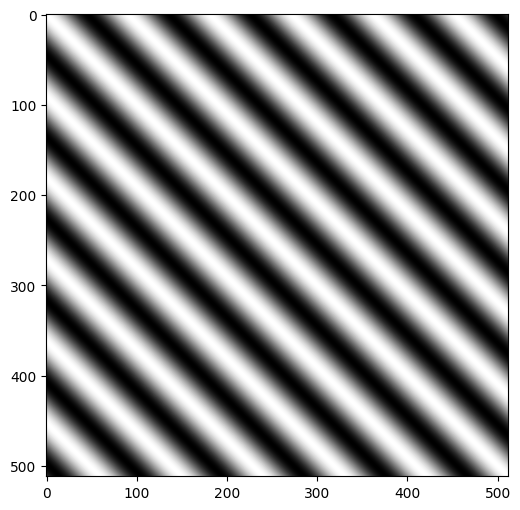

In [2]:
%matplotlib inline
A = 1
theta=45
L=512
T0 = 64
Ts=1
s45 = sinusoid2d(A,theta, L, T0, Ts)
imshow(s45)

2. (a) What is the maximal frequency of previous signal $s_{45}$ in direction $t$ (denoted $f_t^{\text{max}}$) and direction $u$ (denoted $f_u^{\text{max}}$)? Let $f_m = \max(f_t^{\text{max}},f_u^{\text{max}})$. Explain why $f_m$ can be used to derive the limit frequency (in sens of Shannon) for the sampling of $s_{45}$.

2. (b)  Sample $s_{45}$ with $f_s = 16 f_m$ and display the sampled signal.

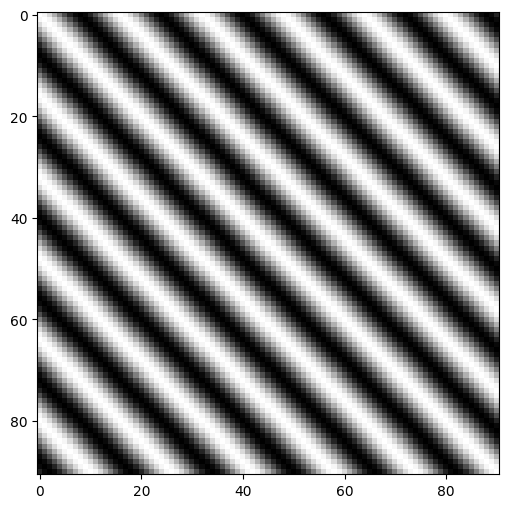

In [3]:
def calculatefm(theta,T0):
    f0 = 1/T0
    ct = np.cos(theta/180*np.pi)
    st = np.sin(theta/180*np.pi)
    ft = f0 * ct
    fu = f0 * st
    fm = max(ft,fu)
    return fm
fm =  calculatefm(theta, T0)
fs_16 = 16 * fm
Ts_16 = 1/fs_16
s45_16 = sinusoid2d(A,theta, L, T0, Ts_16)
imshow(s45_16)


2. (c) Compute the Fourier transform of the sampled signal and display frequencies. One can use `surf()` function for an interactive 3D plot.

In [6]:
import math
def computeFT(I):
    """ Array -> Array[complex] """
    return fft2(I)

def toVisualizeFT(If):
    """ Array[complex] -> Array[float] """
    return fftshift(abs(If))

def toVisualizeLogFT(If):
    """ Array[complex] -> Array[float] """
    Y = fftshift(np.log10(1 + abs(If)))
    return Y

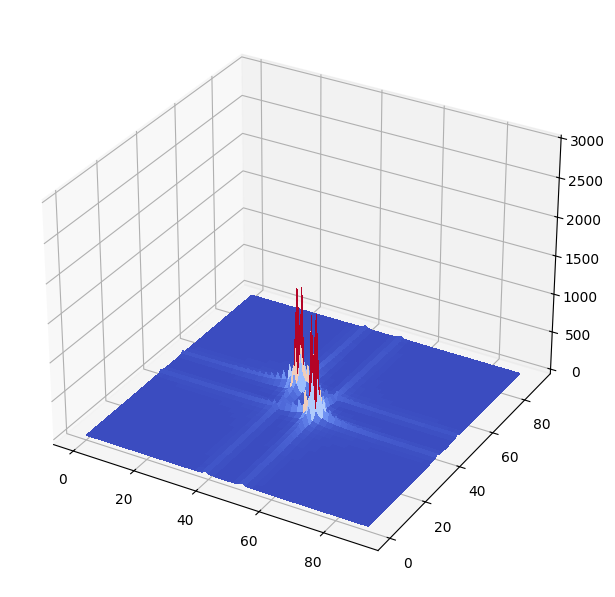

In [7]:
FT_s45_16 = toVisualizeFT(computeFT(s45_16))
surf(FT_s45_16)

2. (d) Comment the spectrum:
    - verify the presence of the two Dirac peaks
    - for various values of $T_s$, observe changes in the spectrum. Compare with the spectrum of the continuous signal ($s_{45}$). What is the origin of these differences?
    - Why, aside from the two Dirac peaks, there are some structures? Explain the origin of these lobes.
    - Increase $T_0$ in order to obtain a unique peak. Explain the origin of this fusion. Verify the limit value of $T_0$ for which the two peaks interfere.

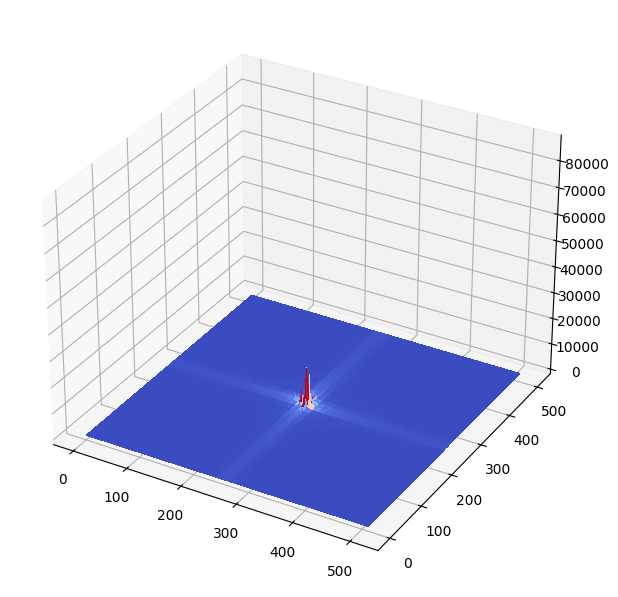

In [8]:
FT_s45 = toVisualizeFT(computeFT(s45))
surf(FT_s45)

3. (a) Sample $s_{45}$ with $f_s=4 f_m$ and display the sampled signal.

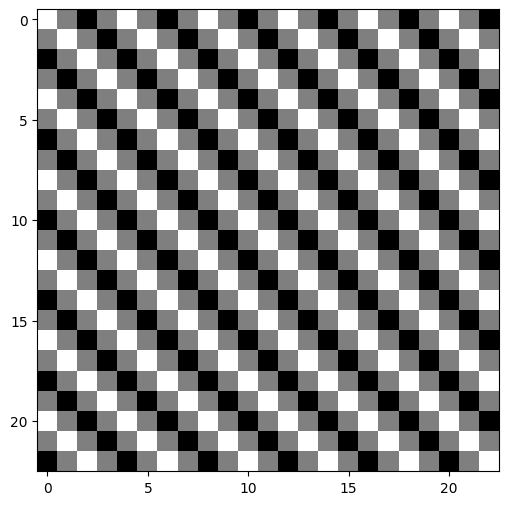

(512, 512)

In [39]:
fs_4 = 4 * fm
Ts_4 = 1/fs_4
s45_4 = sinusoid2d(A,theta, L, T0, Ts_4)
imshow(s45_4)
s45_4.shape
s45.shape

3. (b) Write a function `error()` implementing the relative average error $\displaystyle\epsilon_r = \frac 1{2AL^2}\sum_{k=0}^L\sum_{l=0}^L |x_r(k,l)-x_d(k,l)|$.

In [17]:
def error(A,L,s45,xr):
    sum = 0
    for k in range(L):
        for l in range(L):
            sum += np.abs(xr[k][l] - s45[k][l])
    e = 1/(2*A*L*L) * sum
    return e

3. (c) Reconstruct the sampled signal. Display original and reconstructed signal.
   Print the relative average error between the original and reconstructed images. What is the origin of this error?

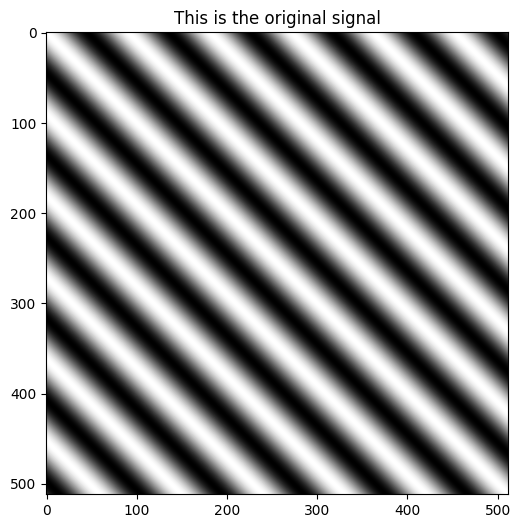

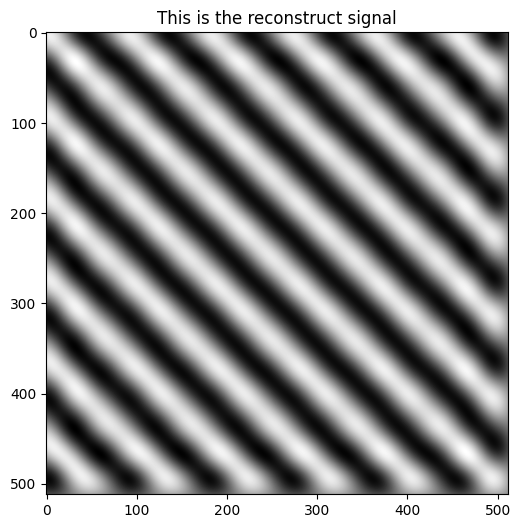

The relative average error:
0.022936924363102643


In [18]:
xr = shannonInterpolation(s45_4, Ts_4, L)
imshow(s45,title="This is the original signal")
imshow(xr, title="This is the reconstruct signal")
print("The relative average error:")
e = error(A,L,s45,xr)
print(e)

4. Same question than 3. with $f_s = \frac32f_m$. Comment the effects of aliasing.

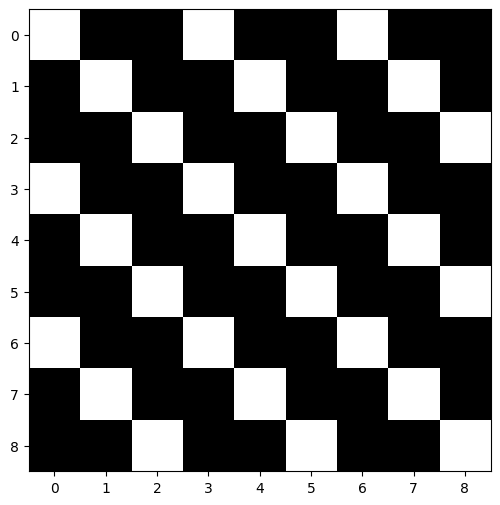

In [19]:
fs_3 = 3/2 * fm
Ts_3 = 1/fs_3
s45_3 = sinusoid2d(A,theta, L, T0, Ts_3)
imshow(s45_3)

5. Consider the continuous signal with an oriention of $\theta=10°$. What is the value of $f_m$? With a sampling of $\frac32 f_s$ what is the additional drawback appearing after the reconstruction? Explain.

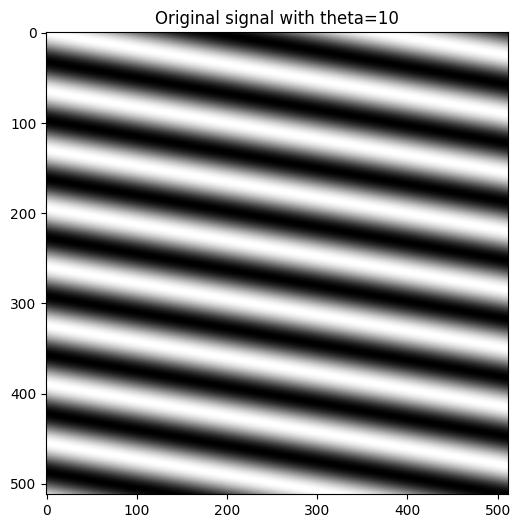

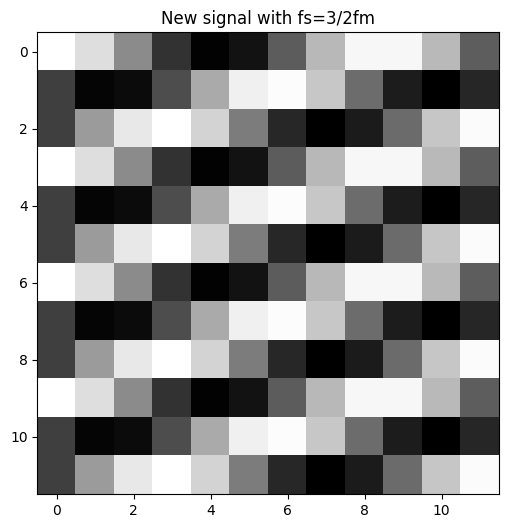

In [20]:
theta2 = 10
fm_2 = calculatefm(theta2,T0)
s10 = sinusoid2d(A, theta2,L,T0,Ts)
imshow(s10, title="Original signal with theta=10")
fs_new = 3/2 * fm_2
Ts_new = 1/fs_new
s10_new = sinusoid2d(A,theta2, L, T0, Ts_new)
imshow(s10_new, title="New signal with fs=3/2fm")

6. Write a function `shannonInterpolationLoop()` implementing equation (1) using four nested loops, in a C way. Compare and discuss the run time of this function and  `shannonInterpolation()` on a small signal ($L=64$). Runtime can be measured using `tic()` and `tac()` functions.
$$
x_r (t,u) = \sum_{k=-\infty}^{+\infty} \sum_{l=\infty}^{+\infty} x_s(kT_s,lT_s) \operatorname{sinc}(\pi f_s (t-kT_s)) \operatorname{sinc}(\pi f_s(u - lT_s))\qquad\qquad\qquad\text{(1)}
$$

In [22]:
from time import process_time
mytime = 0
def tic():
    """ NoneType -> NoneType """
    global mytime
    mytime = process_time()
def tac():
    """ NoneType -> int """
    global mytime
    print (process_time()-mytime)
    mytime = process_time()

### your code starts below

In [50]:
def shannonInterpolationLoop(I, Ts, size):
    """ Array*int*double -> Array[double] """
    n, m = I.shape
    output = np.zeros((size, size))  # Initialize the output array

    for i in range(size):
        for j in range(size):
            sum_val = 0
            for k in range(n):
                for l in range(m):
                    # Compute sinc components and accumulate
                    sinc_X = np.sinc((i/Ts) - k)
                    sinc_Y = np.sinc((j/Ts) - l)
                    sum_val += I[k, l] * sinc_X * sinc_Y
            output[i, j] = sum_val
    
    return output

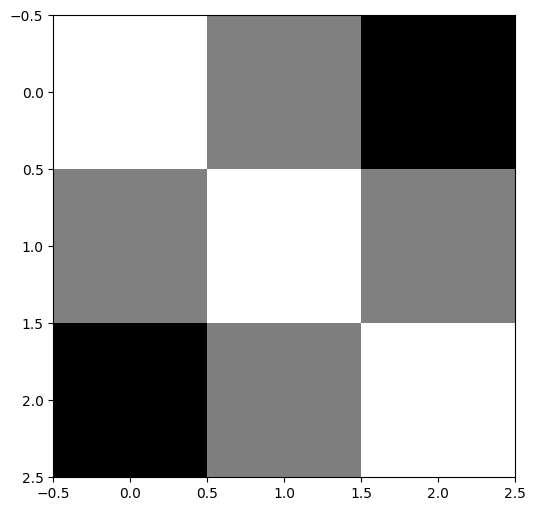

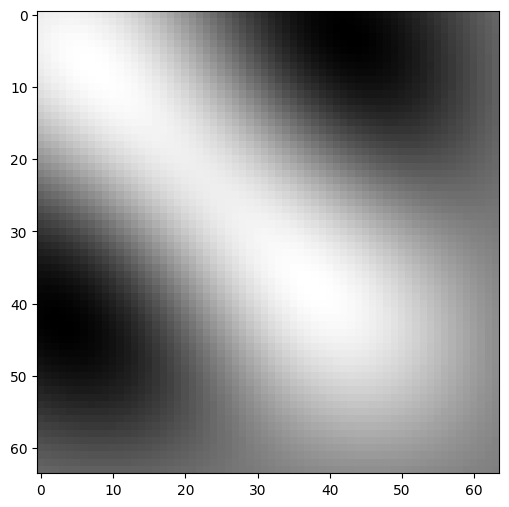

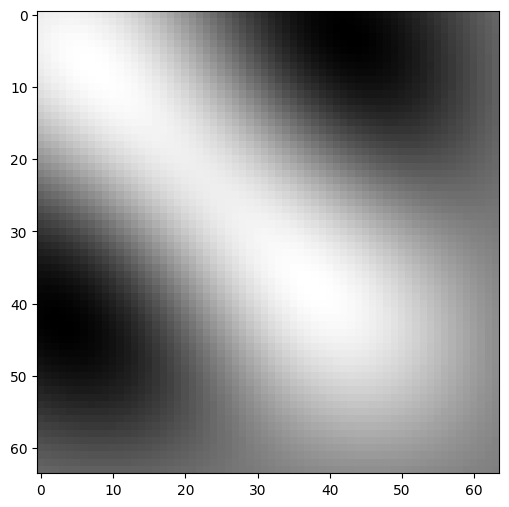

In [53]:
fs_4 = 4 * fm
Ts_4 = 1/fs_4
s45_4 = sinusoid2d(A,theta, 64, T0, Ts_4)
imshow(s45_4)
xr = shannonInterpolationLoop(s45_4,Ts_4,64)
imshow(xr)
xr = shannonInterpolation(s45_4,Ts_4,64)
imshow(xr)


## Exercise 2: aliasing on natural images

In this exercise, we study aliasing on image `img/barbara.png`. Aliasing occurring with subsample of image, we propose to write a code that implements a subsample (using function `subSample2()` of factor 2 on the image.  

1. Explain what is a subsample of factor 2 and the impact when applied on an image. 

2. Write a code that
 - iterates the subsampling process
 - at each iteration, computes the Fourier transform of the subsampled image

   Display subsampled images and their spectrum. Describe and interpret the effects of aliasing. Why aliasing is a drawback ?

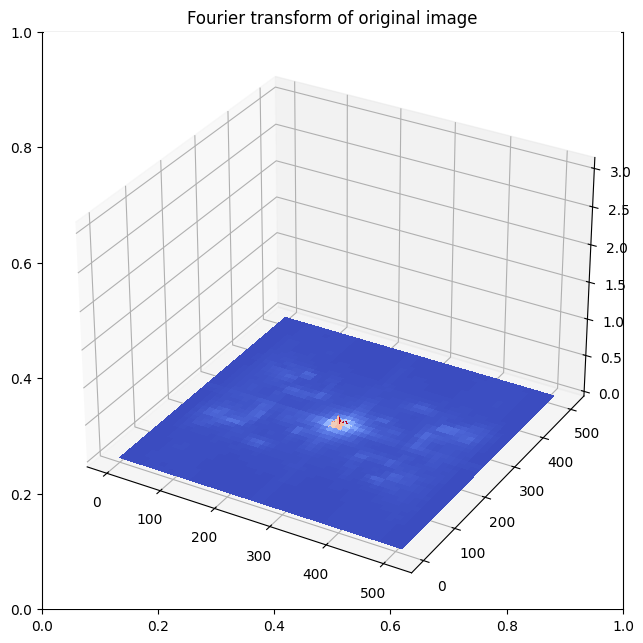

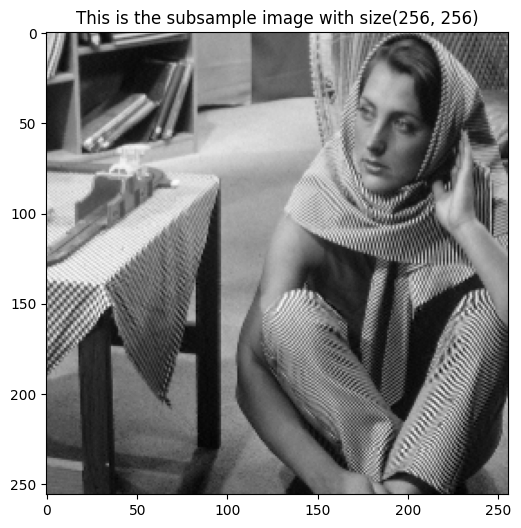

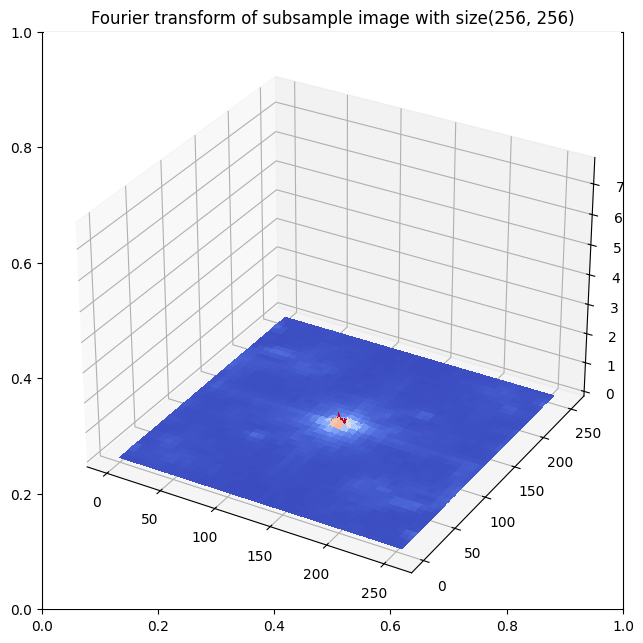

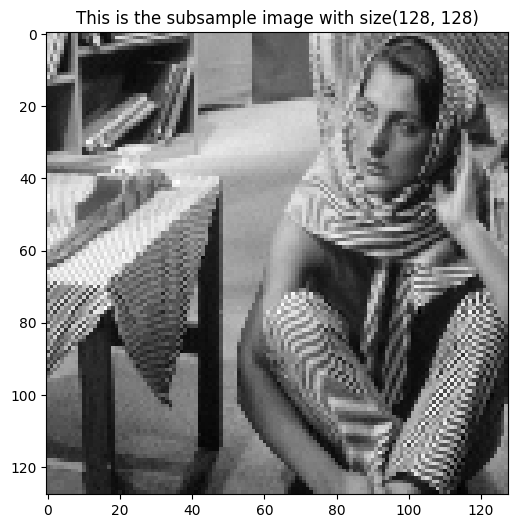

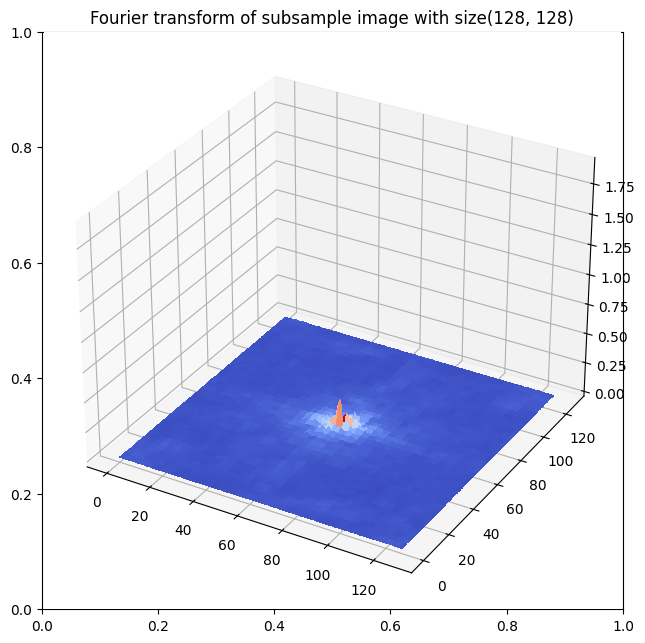

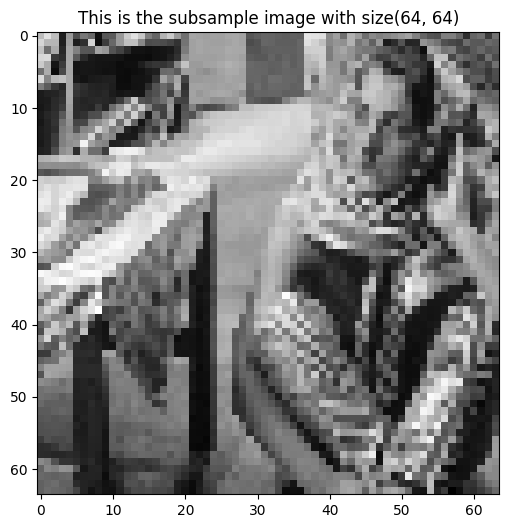

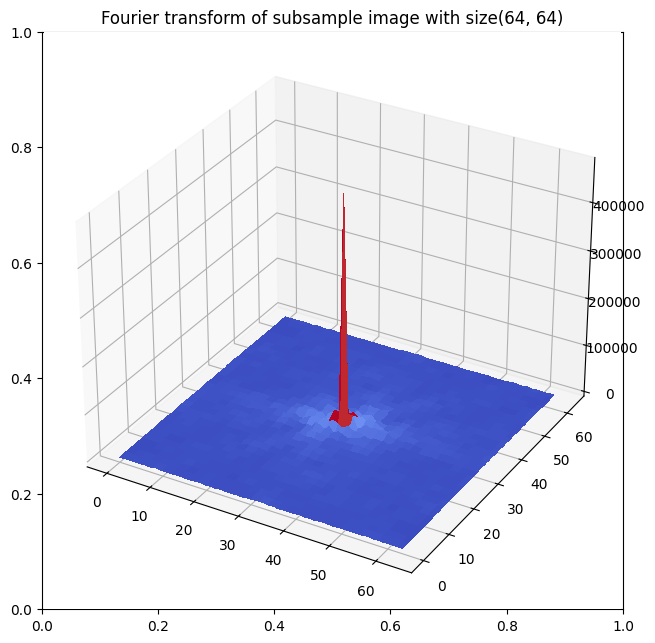

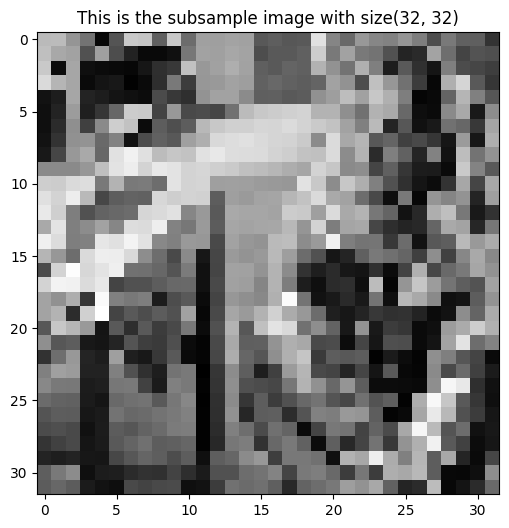

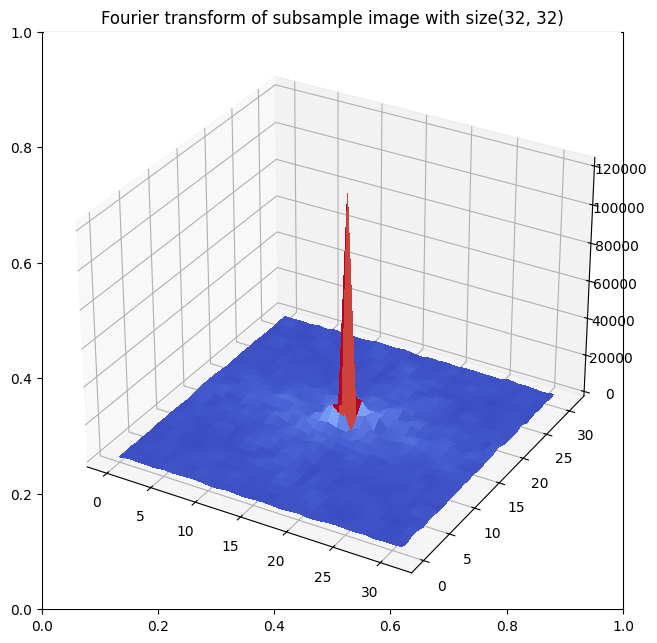

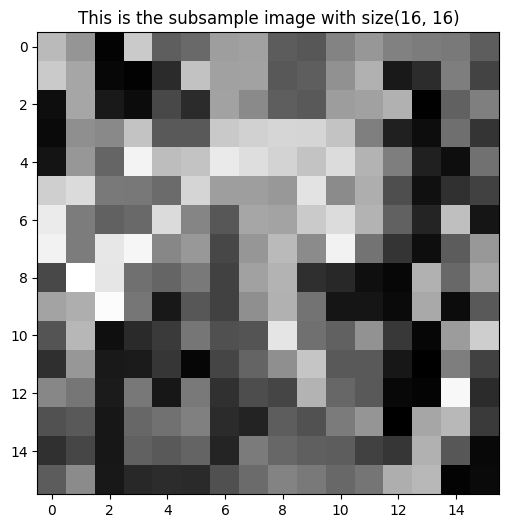

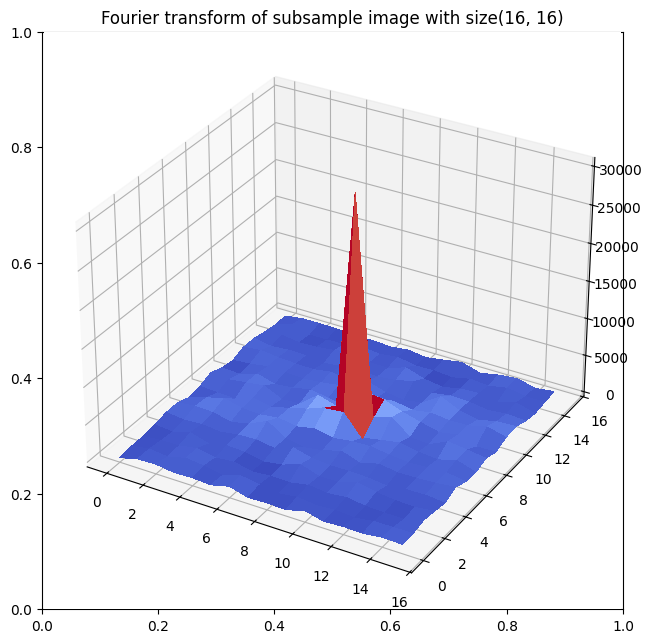

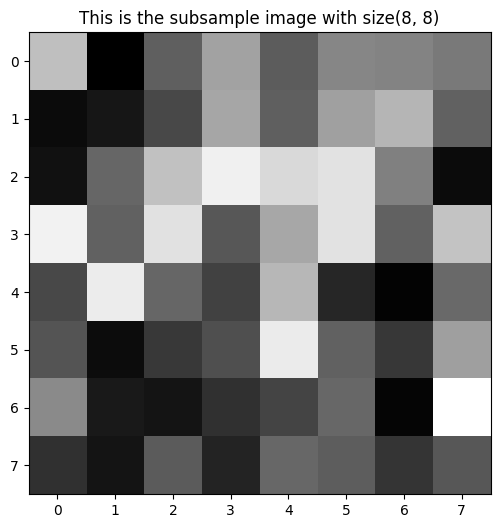

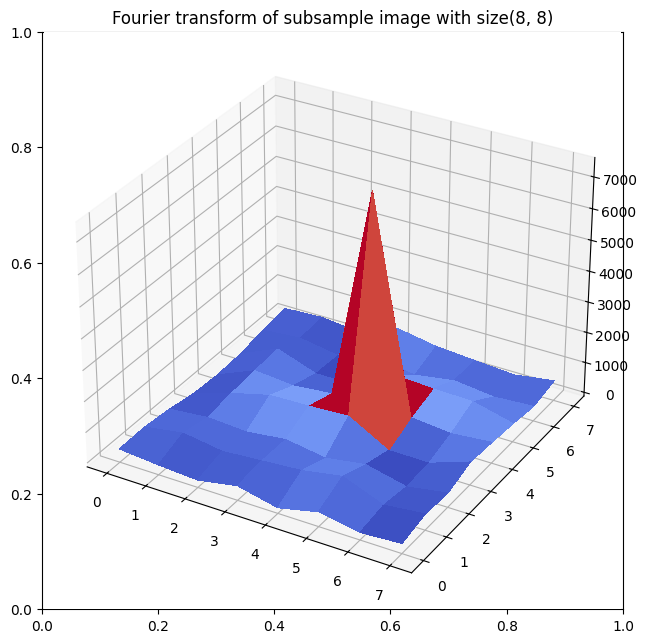

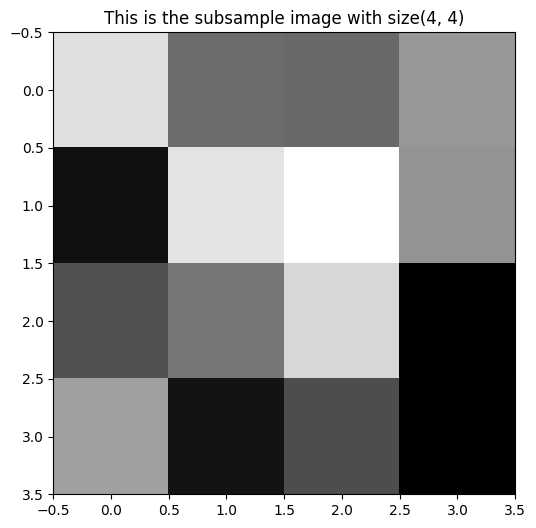

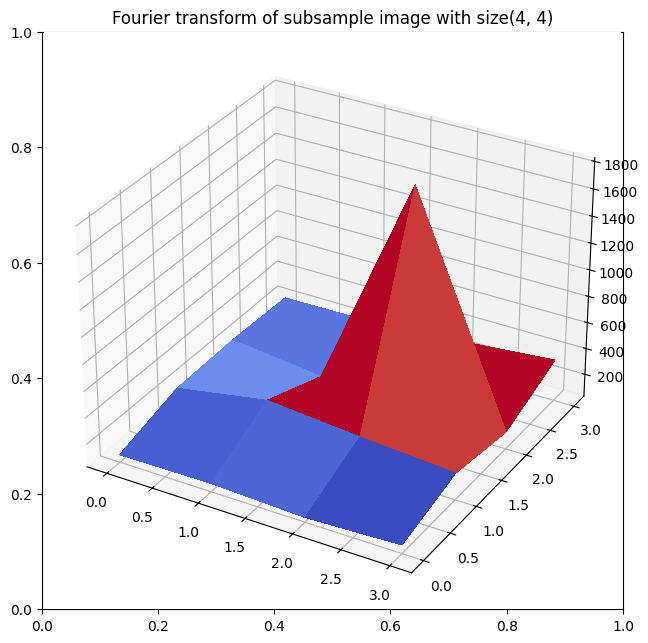

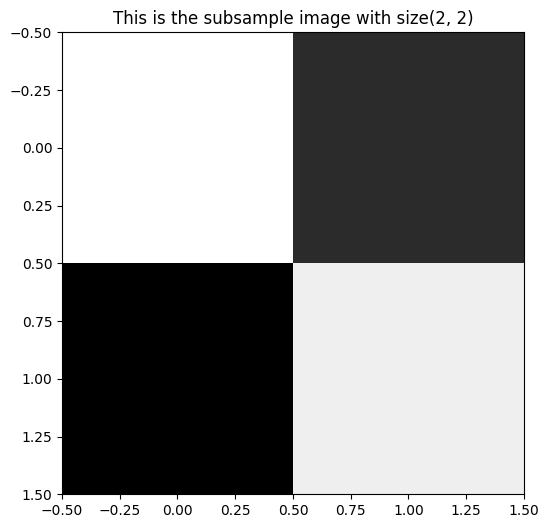

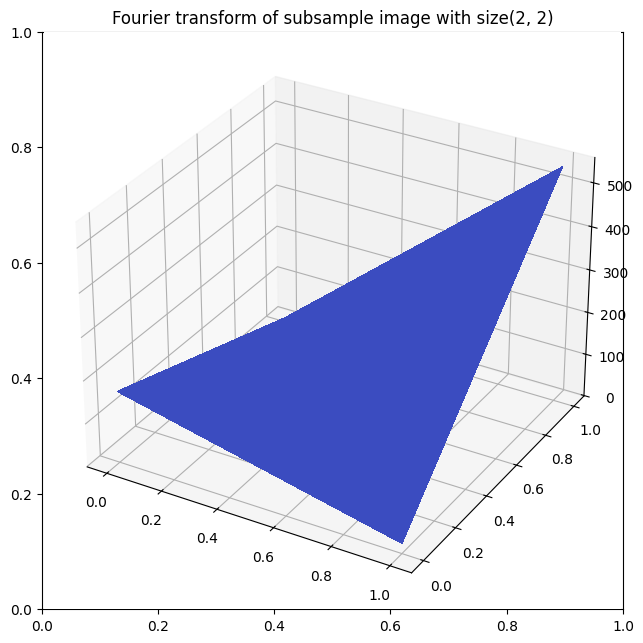

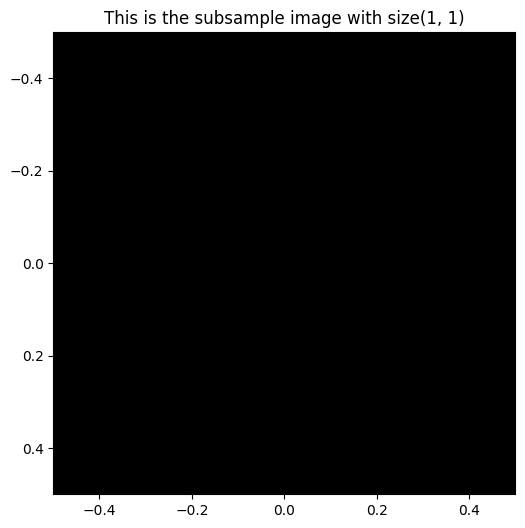

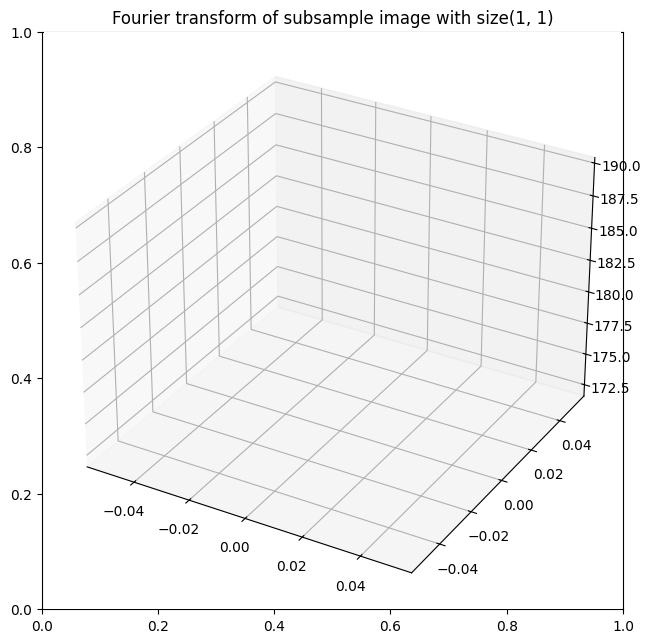

In [82]:
from PIL import Image
signal = np.array(Image.open('img/barbara.png'))
FT = computeFT(signal)
title = "Fourier transform of original image"
surf(toVisualizeFT(FT),title=title)
def subSample2(I):
    # Sample the signal by taking every T_s element
    return I[::2,::2]

x = signal.shape[0]
while x>1:
    signal = subSample2(signal)
    FT = computeFT(signal)
    title = "This is the subsample image with size" + str(signal.shape)
    imshow(signal, title=title)
    title = "Fourier transform of subsample image with size" + str(signal.shape)
    surf(toVisualizeFT(FT),title=title)
    x = signal.shape[0]


3. Same question with the image `img/mandrill.png`.

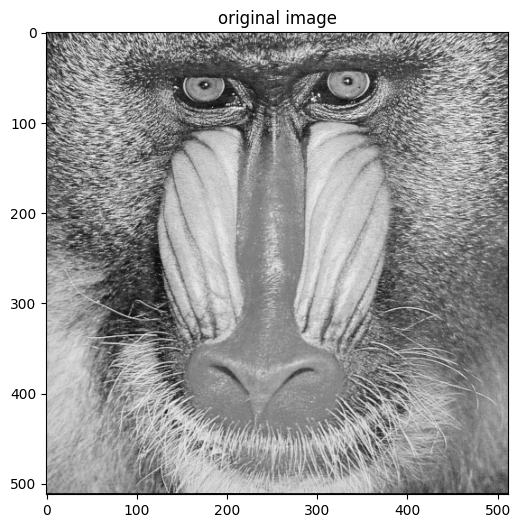

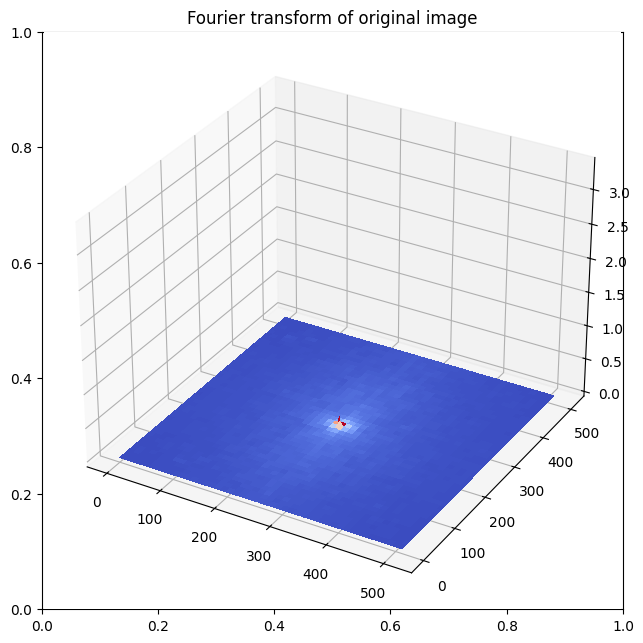

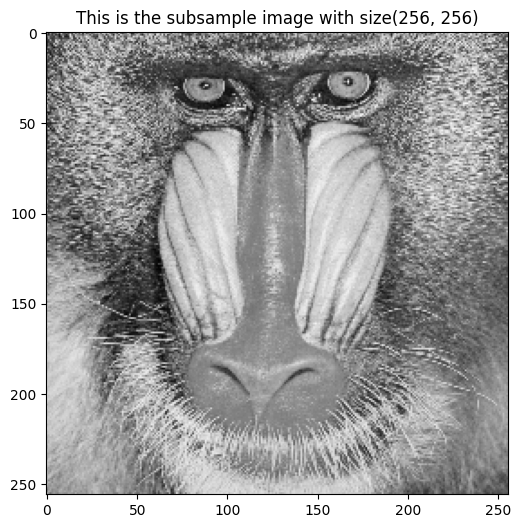

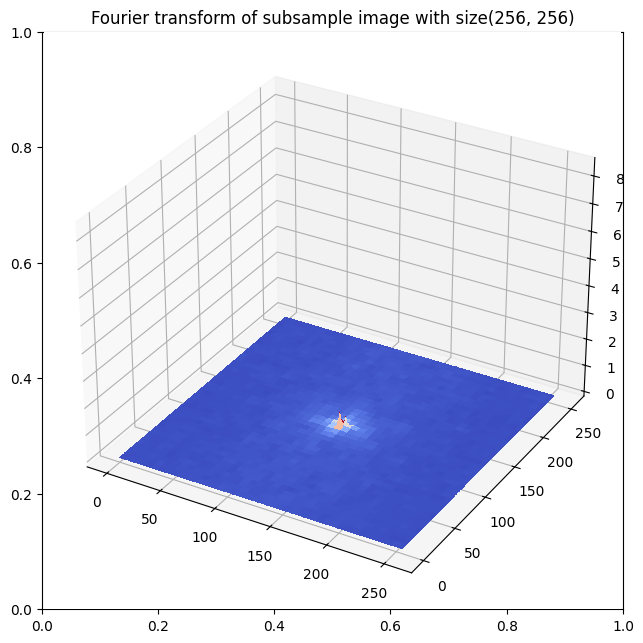

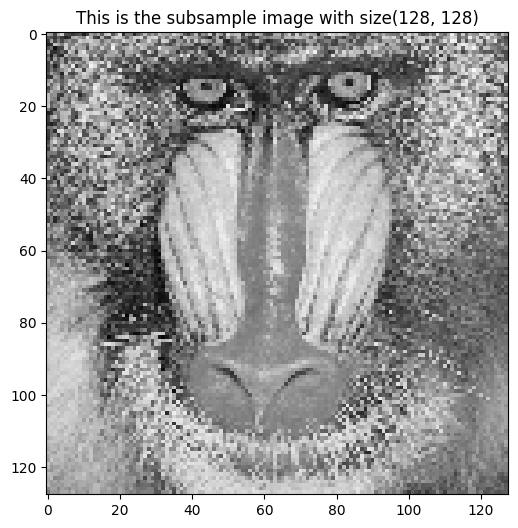

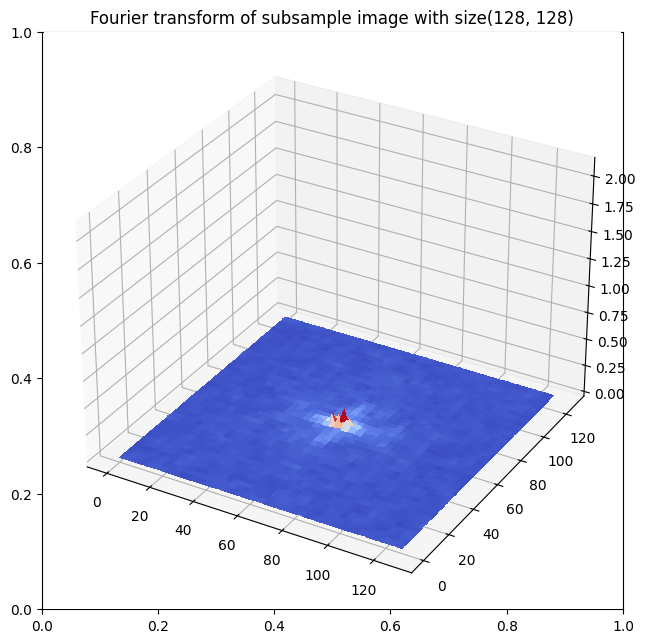

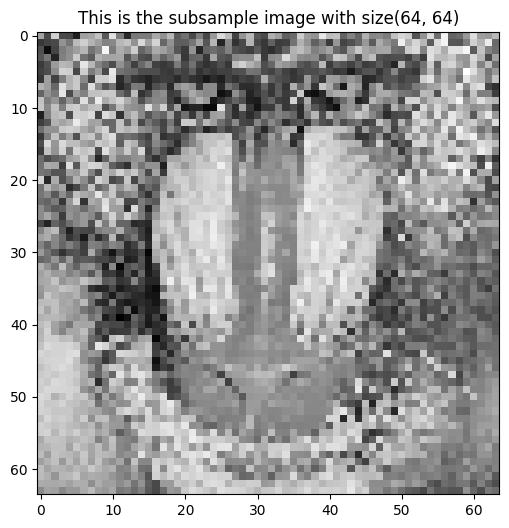

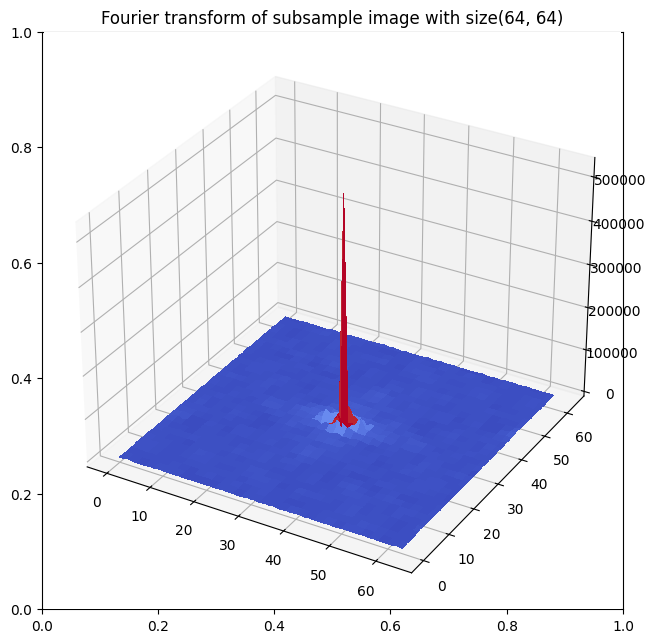

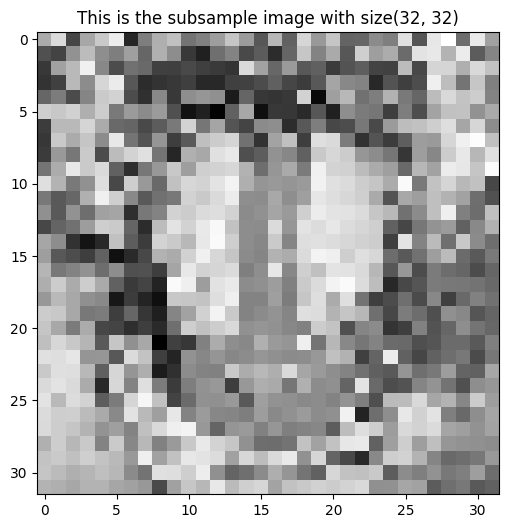

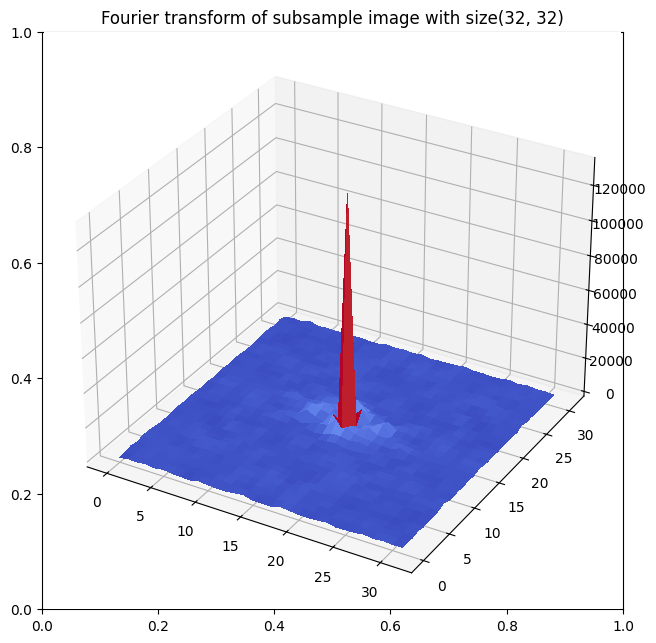

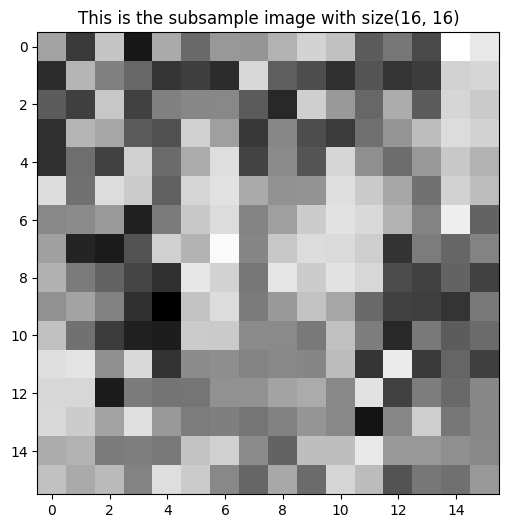

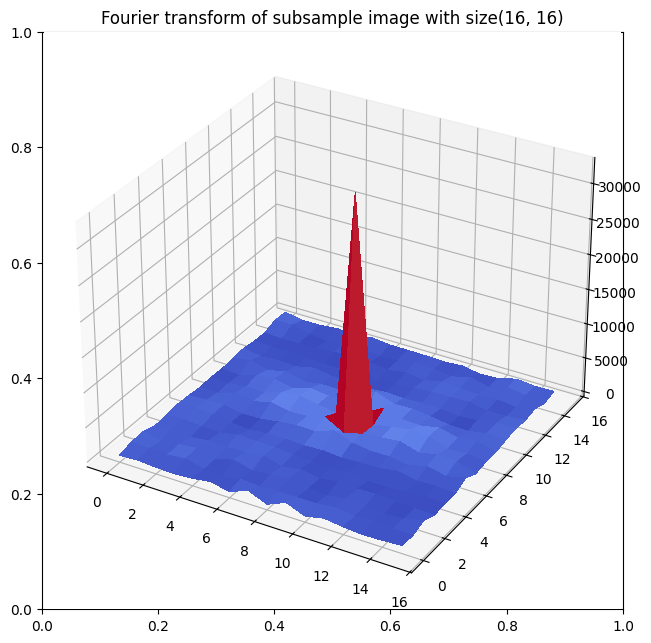

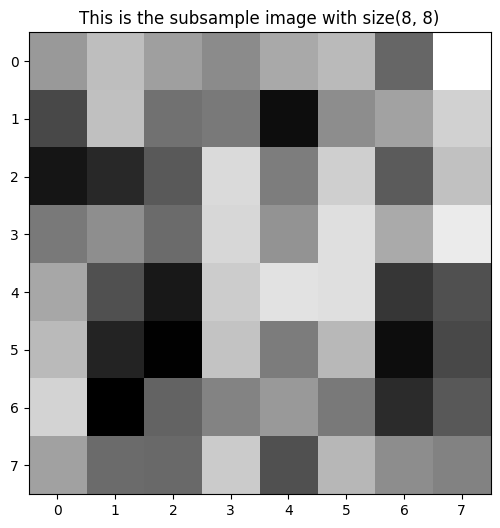

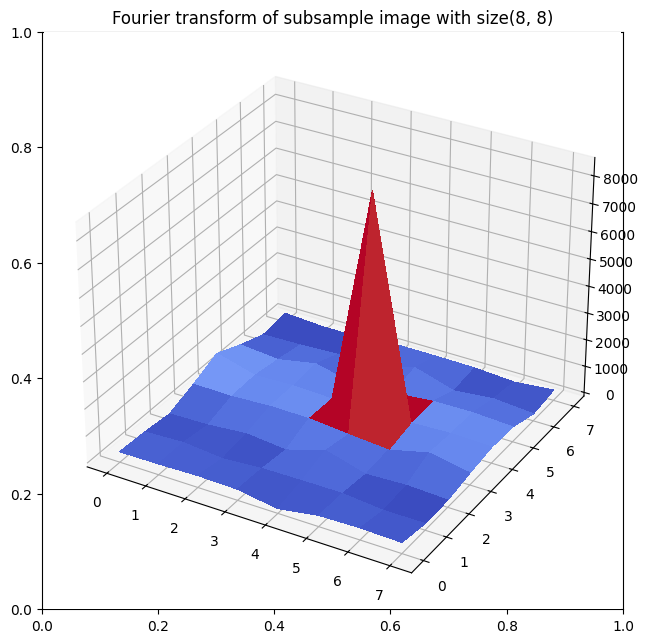

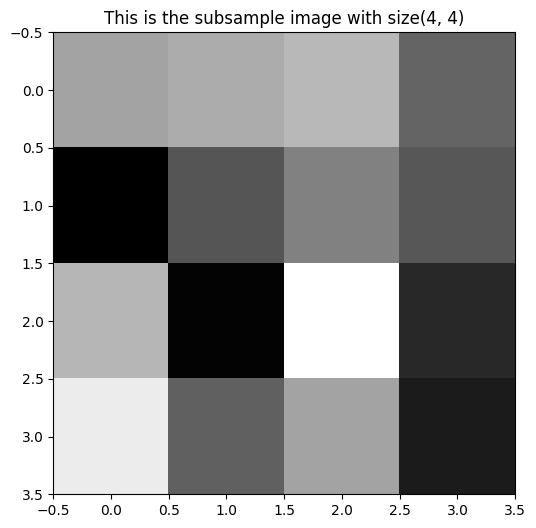

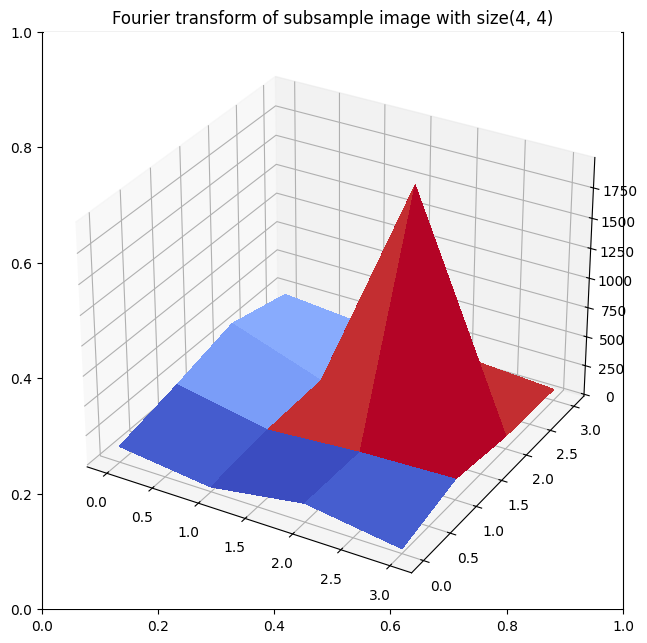

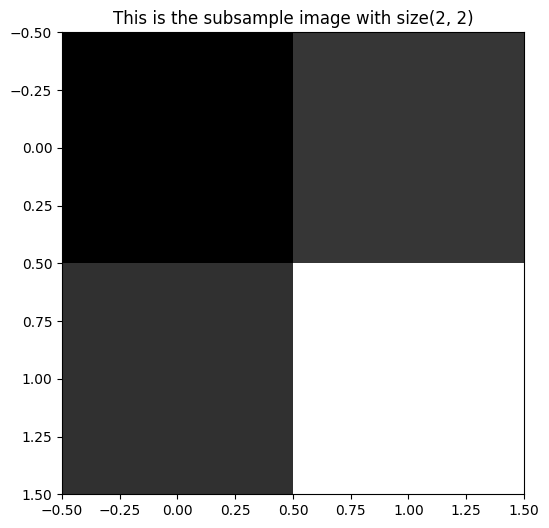

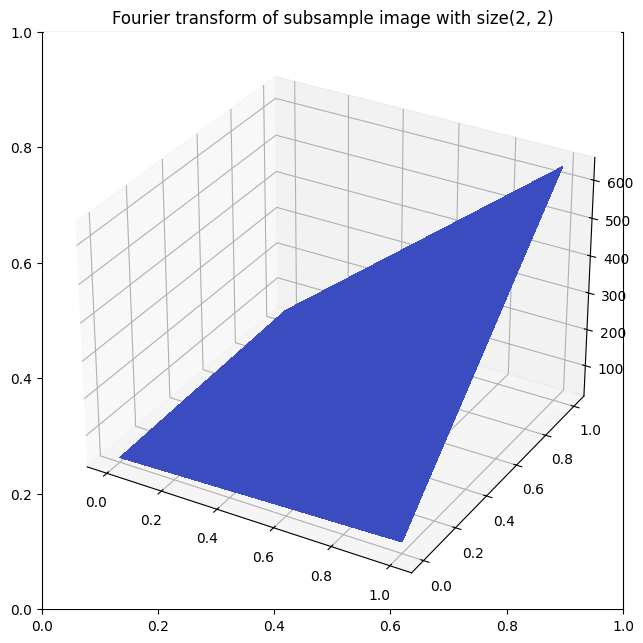

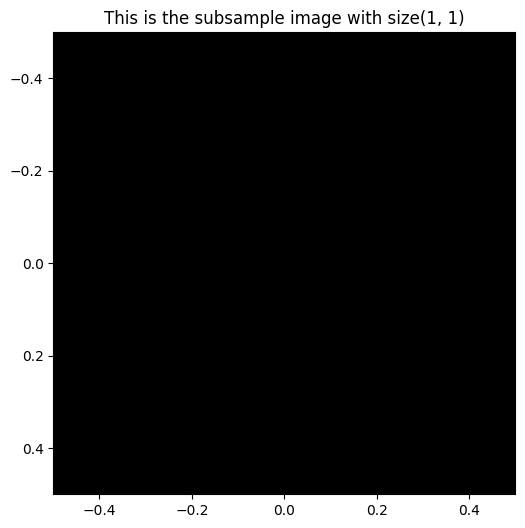

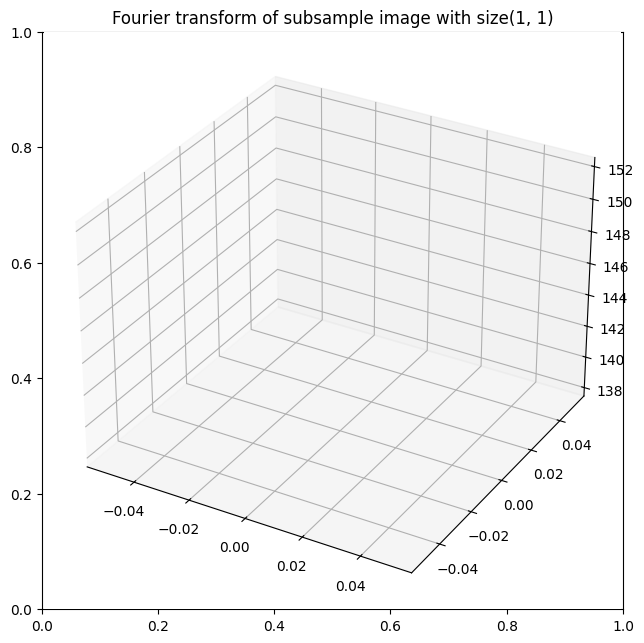

In [89]:
from PIL import Image
mandrill = np.array(Image.open('img/mandrill.png'))
### your code and comments start below
imshow(mandrill,title="original image")
FT = computeFT(mandrill)
title = "Fourier transform of original image"
surf(toVisualizeFT(FT),title=title)
def subSample2(I):
    # Sample the signal by taking every T_s element
    return I[::2,::2]

x = mandrill.shape[0]
while x>1:
    mandrill = subSample2(mandrill)
    FT = computeFT(mandrill)
    title = "This is the subsample image with size" + str(mandrill.shape)
    imshow(mandrill, title=title)
    title = "Fourier transform of subsample image with size" + str(mandrill.shape)
    surf(toVisualizeFT(FT),title=title)
    x = mandrill.shape[0]
